In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(df.shape)
df.columns.values

(7043, 21)


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

#### Checking for Missing Values

We explore the data for any missing values in the DataFrame. We can see that all fields have 0 missing values instances.


In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Summary Statistics

Generating summary statistics for numerical columns, including count, mean, standard deviation, and percentiles


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Exploring field distribution

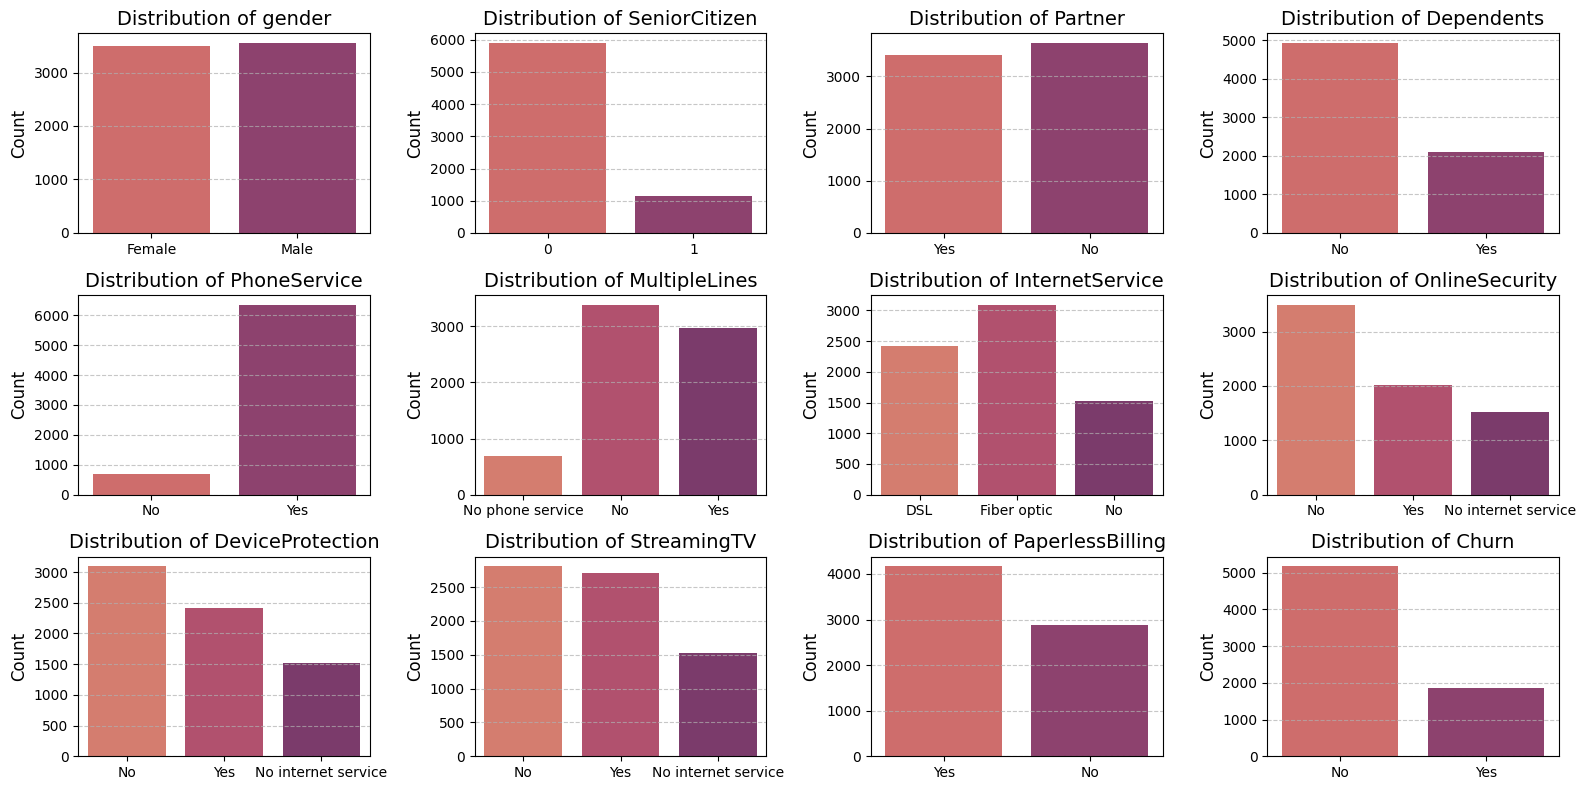

In [24]:
columns_to_plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'StreamingTV', 'PaperlessBilling','Churn']
fig, axes = plt.subplots(3, 4, figsize=(16, 8))  
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.countplot(data=df, x=col, hue=col, ax=axes[i], palette='flare', legend=False)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

#### Monthly and Total Charges 

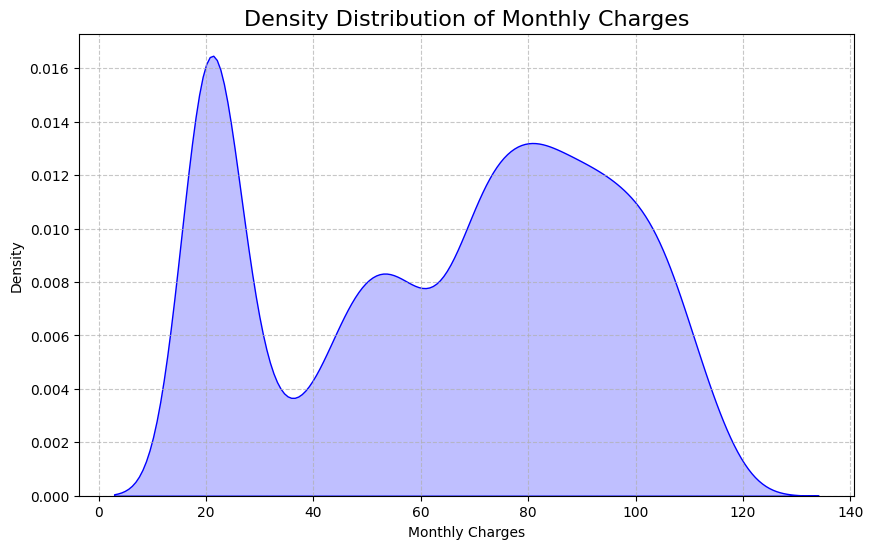

In [35]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='MonthlyCharges', fill=True, color='blue')
plt.title('Density Distribution of Monthly Charges', fontsize=16)
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [40]:
mean_total_charges = df['TotalCharges'].mean()
median_total_charges = df['TotalCharges'].median()
mode_total_charges = df['TotalCharges'].mode()[0]  # mode() returns a Series, so take the first value
percentiles_total_charges = df['TotalCharges'].quantile([0.25, 0.5, 0.75, 0.95])

print(f"Mean of Total Charges: {mean_total_charges:.2f}")
print(f"Median of Total Charges: {median_total_charges:.2f}")
print(f"Mode of Total Charges: {mode_total_charges:.2f}")
print("Percentiles of Total Charges:")
print(percentiles_total_charges)

Mean of Total Charges: 2283.30
Median of Total Charges: 1397.47
Mode of Total Charges: 20.20
Percentiles of Total Charges:
0.25     401.4500
0.50    1397.4750
0.75    3794.7375
0.95    6923.5900
Name: TotalCharges, dtype: float64


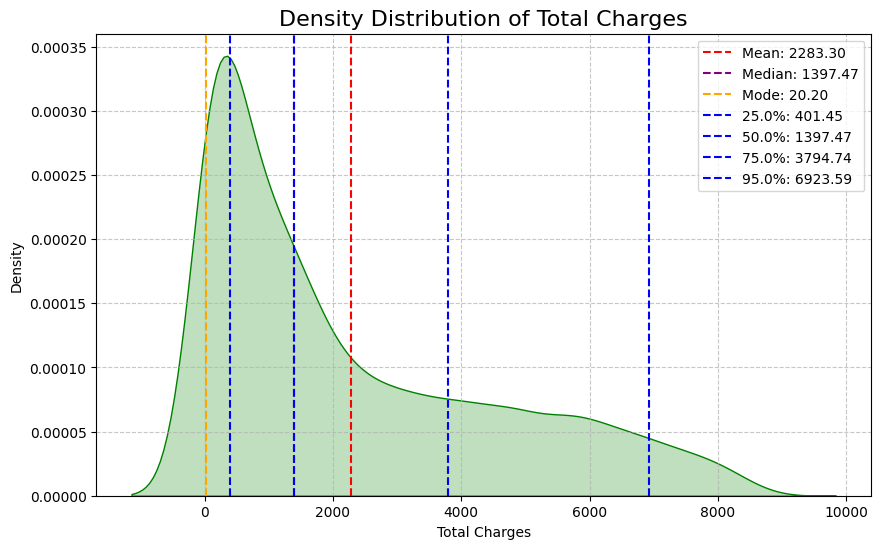

In [41]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='TotalCharges', fill=True, color='green')
plt.title('Density Distribution of Total Charges', fontsize=16)
plt.xlabel('Total Charges')
plt.ylabel('Density')

# Annotating the plot with statistics
plt.axvline(mean_total_charges, color='red', linestyle='--', label=f'Mean: {mean_total_charges:.2f}')
plt.axvline(median_total_charges, color='purple', linestyle='--', label=f'Median: {median_total_charges:.2f}')
plt.axvline(mode_total_charges, color='orange', linestyle='--', label=f'Mode: {mode_total_charges:.2f}')
for percentile, value in percentiles_total_charges.items():
    plt.axvline(value, color='blue', linestyle='--', label=f'{percentile*100}%: {value:.2f}')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### Key Insights from the Density Distributions

- **Total Charges**: Highly right-skewed with most customers having low total charges. A few high-value outliers pull the mean above the median
- **Monthly Charges**: Bimodal distribution suggests two main customer segments, possibly indicating different service tiers
- **Revenue Distribution**: Majority of revenue likely comes from a smaller group with higher total charges
- **Customer Behavior**: Many customers may be new or have minimal charges, indicating recent sign-ups or promotional plans

73.4630129206304 % of customers stayed in the company
26.536987079369588 % of customers left with the company


<AxesSubplot: xlabel='gender', ylabel='count'>

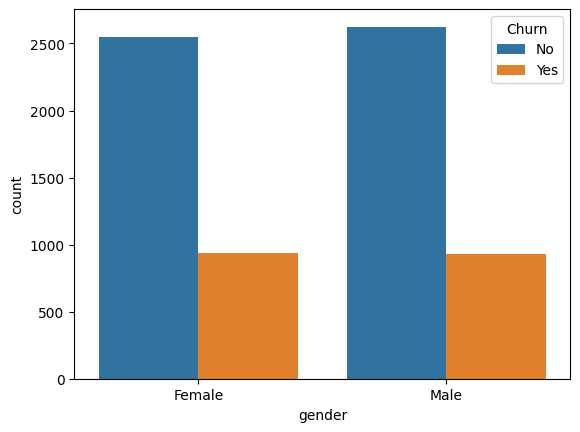

In [43]:
numRetained = df[df.Churn == 'No'].shape[0]
numChurned = df[df.Churn == 'Yes'].shape[0]

# print the percentage of customers that stayed
print(numRetained/(numRetained + numChurned) * 100,'% of customers stayed in the company')
# peint the percentage of customers that left
print(numChurned/(numRetained + numChurned) * 100, '% of customers left with the company')

sns.countplot(x ='gender', hue='Churn', data=df)

<AxesSubplot: xlabel='InternetService', ylabel='count'>

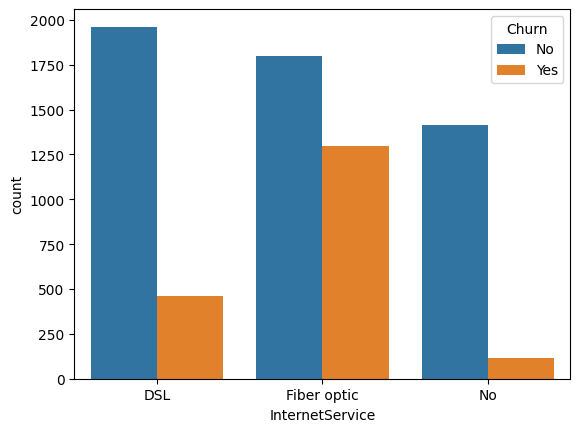

In [12]:
sns.countplot(x='InternetService', hue='Churn', data=df)

array([<AxesSubplot: title={'center': 'tenure'}>,
       <AxesSubplot: title={'center': 'MonthlyCharges'}>], dtype=object)

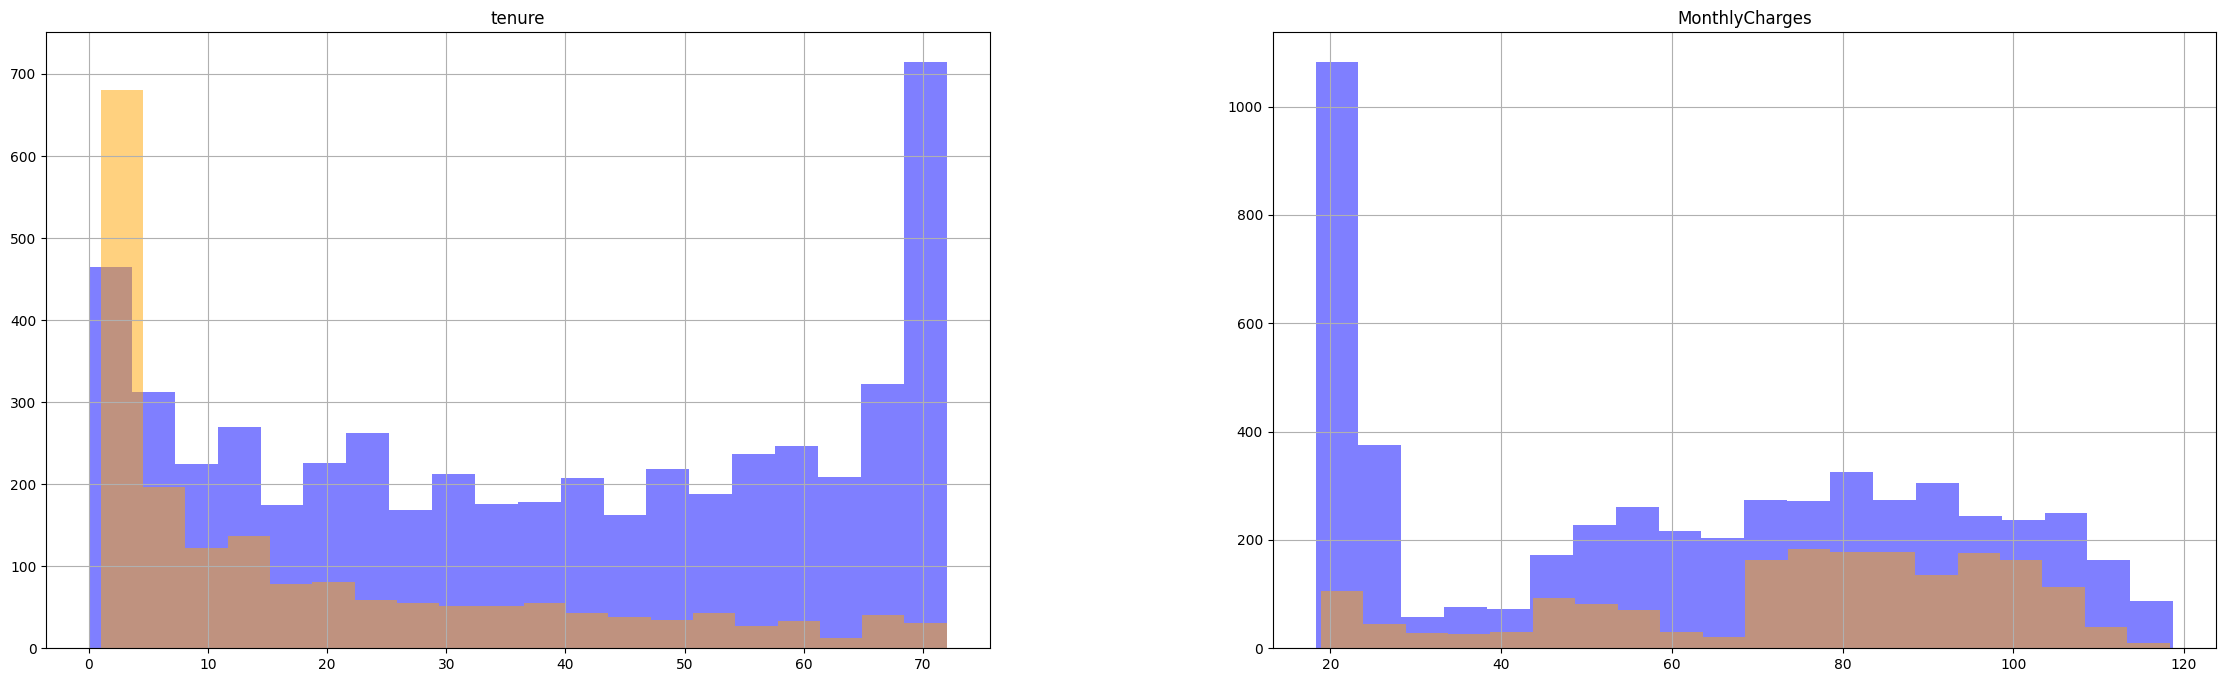

In [13]:
numericFeatures = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1,2, figsize=(28, 8))
df[df.Churn == "No"][numericFeatures].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numericFeatures].hist(bins=20, color='orange', alpha=0.5, ax=ax)

In [16]:
cleanDF = df.drop('customerID', axis=1)
#Convert all the non-numeric columns to numeric
for column in cleanDF.columns:
  if cleanDF[column].dtype == np.number:
    continue
  cleanDF[column] = LabelEncoder().fit_transform(cleanDF[column])

C:\Users\pizza\AppData\Local\Temp\ipykernel_13352\3957980988.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleanDF[column].dtype == np.number:


In [17]:
cleanDF.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

## Scale the data

In [19]:
x = cleanDF.drop('Churn', axis=1)

y = cleanDF['Churn']
x = StandardScaler().fit_transform(x)

In [21]:
print(x)

[[-1.00955867 -0.43991649  1.03453023 ...  0.39855772 -1.16032292
  -0.39860759]
 [ 0.99053183 -0.43991649 -0.96662231 ...  1.33486261 -0.25962894
  -0.94876238]
 [ 0.99053183 -0.43991649 -0.96662231 ...  1.33486261 -0.36266036
  -1.64188328]
 ...
 [-1.00955867 -0.43991649  1.03453023 ...  0.39855772 -1.1686319
  -0.13968008]
 [ 0.99053183  2.27315869  1.03453023 ...  1.33486261  0.32033821
  -0.31653445]
 [ 0.99053183 -0.43991649 -0.96662231 ... -1.47405205  1.35896134
   1.13801338]]


In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [23]:
model = LogisticRegression()
# Train the model
model.fit(xtrain, ytrain)

LogisticRegression()

In [24]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [25]:
predictions = model.predict(xtest)

# print the predictions
print(predictions)

[1 0 0 ... 0 0 0]


In [26]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

# Explore the dataset
print(data.head())
print(data.describe())
print(data.isnull().sum())

# Data preprocessing
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model selection and training
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Linear Regression:')
print('Training MSE:', mean_squared_error(y_train, y_train_pred))
print('Testing MSE:', mean_squared_error(y_test, y_test_pred))
print('Training R-squared:', r2_score(y_train, y_train_pred))
print('Testing R-squared:', r2_score(y_test, y_test_pred))

# Cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print('Cross-validated MSE:', -cv_scores.mean())

# Feature engineering with polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
y_train_poly_pred = lr_poly.predict(X_train_poly)
y_test_poly_pred = lr_poly.predict(X_test_poly)
print('Polynomial Regression:')
print('Training MSE:', mean_squared_error(y_train, y_train_poly_pred))
print('Testing MSE:', mean_squared_error(y_test, y_test_poly_pred))
print('Training R-squared:', r2_score(y_train, y_train_poly_pred))
print('Testing R-squared:', r2_score(y_test, y_test_poly_pred))

# Train a Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_train_ridge_pred = ridge.predict(X_train)
y_test_ridge_pred = ridge.predict(X_test)
print('Ridge Regression:')
print('Training MSE:', mean_squared_error(y_train, y_train_ridge_pred))
print('Testing MSE:', mean_squared_error(y_test, y_test_ridge_pred))
print('Training R-squared:', r2_score(y_train, y_train_ridge_pred))
print('Testing R-squared:', r2_score(y_test, y_test_ridge_pred))

# Train a Lasso Regression model
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_train_lasso_pred = lasso.predict(X_train)
y_test_lasso_pred = lasso.predict(X_test)
print('Lasso Regression:')
print('Training MSE:', mean_squared_error(y_train, y_train_lasso_pred))
print('Testing MSE:', mean_squared_error(y_test, y_test_lasso_pred))
print('Training R-squared:', r2_score(y_train, y_train_lasso_pred))
print('Testing R-squared:', r2_score(y_test, y_test_lasso_pred))


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333